In [3]:
%load_ext autoreload
%autoreload 2
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

sns.set_style('darkgrid')
warnings.simplefilter('ignore')

from preprocess import pack
import optimization
from features import Features, features_targets

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from xgboost import XGBClassifier

### Bayesian Search 

In [4]:
feat = Features(**pack)
data = feat.execute()
container = features_targets(data)
trainx = container.trainx
trainy = container.trainy

trainx,valx,trainy,valy=train_test_split(trainx,trainy,test_size=0.2,stratify=trainy)
trainx.reset_index(inplace=True,drop=True)
valx.reset_index(inplace=True,drop=True)
trainy.reset_index(inplace=True,drop=True)
valy.reset_index(inplace=True,drop=True)

best_params = optimization.optimizer(trainx,trainy, 'XGBoost_classif')
pickle.dumb(best_params,open(r"model_params/best_params.p",'wb'))

### Train on best params

In [ ]:
model=optimization.model
best_params=pickle.load(open(r"model_params/best_params.p",'rb'))
model.set_params(**best_params)
model.fit(trainx,trainy)
t_preds=model.predict(trainx)
v_preds=model.predict(valx)

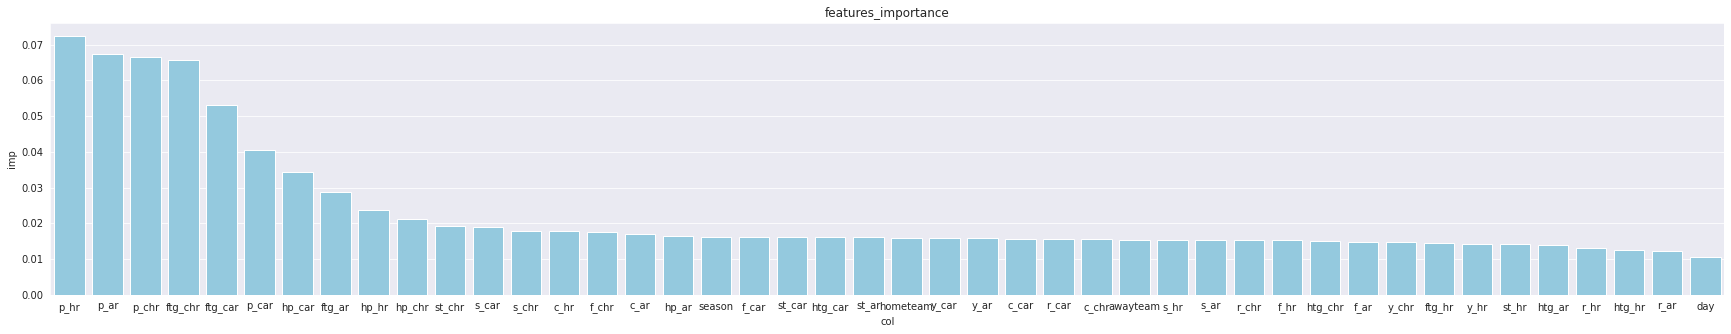

In [9]:
plt.figure(figsize=(30,5))
imp=pd.DataFrame({'col':trainx.columns,'imp':model.feature_importances_})
imp.sort_values('imp',ascending=False,inplace=True)
imp.reset_index(drop=True,inplace=True)
plt.title('features_importance')
sns.barplot(imp['col'],imp['imp'],color='skyblue');

### Esvaluation

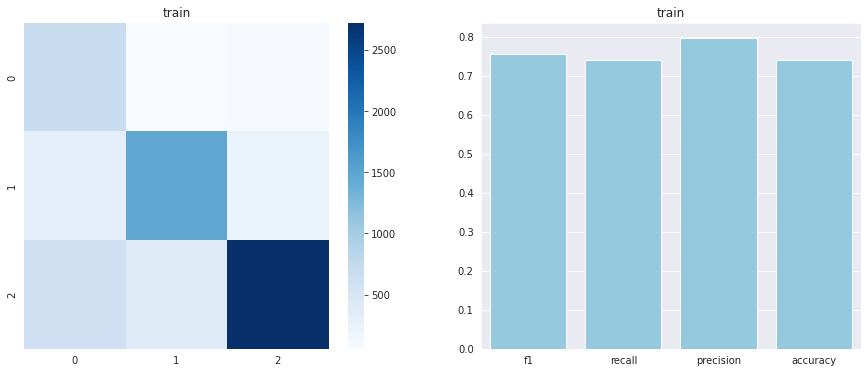

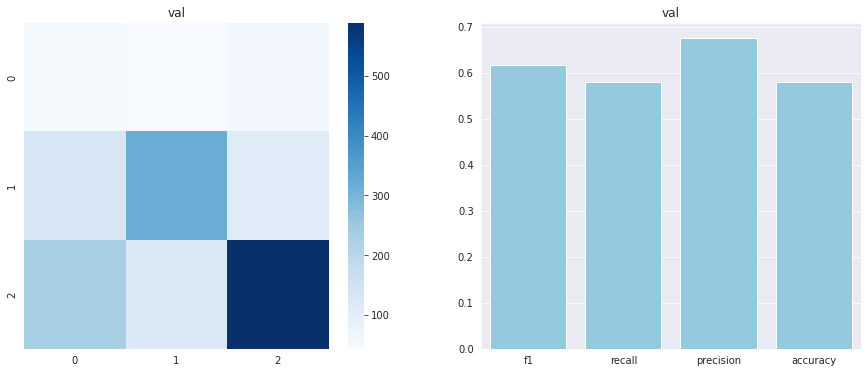

In [9]:
def return_matrics(preds,targets,title):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    plt.title(title)
    sns.heatmap(confusion_matrix(preds,targets),cmap='Blues');
    scores=[f1_score(preds,targets,average='weighted'),recall_score(preds,targets,average='weighted'),precision_score(preds,targets,average='weighted'),accuracy_score(preds,targets)]
    score_names=['f1','recall','precision','accuracy']
    plt.subplot(1, 2, 2)
    plt.title(title)
    sns.barplot(score_names,scores,color='skyblue');
    
return_matrics(t_preds,trainy,'train')
return_matrics(v_preds,valy,'val')